**Load data**

In [1]:
import numpy as np

# Load XSound.npy
XSound = np.load('XSound.npy')

# Load YSound.npy
YSound = np.load('YSound.npy')

**Train network**

In [14]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

# Split the data into training (70%), validation (15%), and test (15%) sets
X_train, X_temp, Y_train, Y_temp = train_test_split(XSound, YSound, test_size=0.3, random_state=42)
X_valid, X_test, Y_valid, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

# You can adjust the test_size and random_state as needed

# Reshape the data if necessary (required for CNN)
X_train = X_train.reshape(X_train.shape[0], 62, 65, 1)
X_valid = X_valid.reshape(X_valid.shape[0], 62, 65, 1)
X_test = X_test.reshape(X_test.shape[0], 62, 65, 1)

# Define the CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(62, 65, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(4, activation='softmax')  # 4 classes for "Yes," "No," "Stop," and "Go"
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training the model
history = model.fit(X_train, Y_train, epochs=10, validation_data=(X_valid, Y_valid))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print(f'Test accuracy: {test_accuracy}')


Epoch 1/10
345/345 [==============================] - 8s 24ms/step - loss: 0.5633 - accuracy: 0.7934 - val_loss: 0.3495 - val_accuracy: 0.8806
Epoch 2/10
345/345 [==============================] - 8s 24ms/step - loss: 0.2886 - accuracy: 0.8965 - val_loss: 0.3079 - val_accuracy: 0.8962
Epoch 3/10
345/345 [==============================] - 8s 23ms/step - loss: 0.1895 - accuracy: 0.9354 - val_loss: 0.2583 - val_accuracy: 0.9208
Epoch 4/10
345/345 [==============================] - 8s 23ms/step - loss: 0.1351 - accuracy: 0.9533 - val_loss: 0.2138 - val_accuracy: 0.9314
Epoch 5/10
345/345 [==============================] - 8s 23ms/step - loss: 0.1001 - accuracy: 0.9648 - val_loss: 0.2375 - val_accuracy: 0.9310
Epoch 6/10
345/345 [==============================] - 8s 23ms/step - loss: 0.0701 - accuracy: 0.9762 - val_loss: 0.2645 - val_accuracy: 0.9263
Epoch 7/10
345/345 [==============================] - 8s 24ms/step - loss: 0.0632 - accuracy: 0.9795 - val_loss: 0.2702 - val_accuracy: 0.9318

f:\Coding\Env\python\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


CNNs can be suitable for audio classification, especially when the data is represented as spectrograms. However, the suitability depends on the specific characteristics of the dataset and the problem at hand. It's essential to consider factors like context, feature engineering, and model size when deciding on the architecture for audio classification. In some cases, hybrid models or attention-based models might offer a better solution for capturing the temporal aspects of audio data.

**Classify instances of the test set using your models**

In [15]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

74/74 [==============================] - 1s 7ms/step


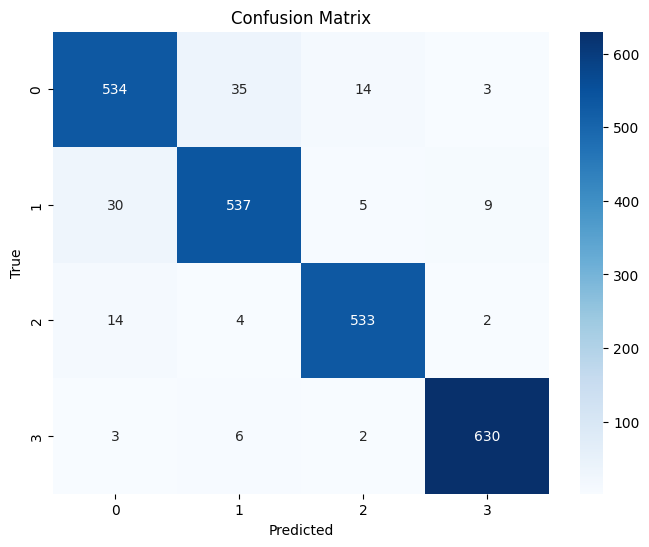

              precision    recall  f1-score   support

           0       0.92      0.91      0.92       586
           1       0.92      0.92      0.92       581
           2       0.96      0.96      0.96       553
           3       0.98      0.98      0.98       641

    accuracy                           0.95      2361
   macro avg       0.95      0.95      0.95      2361
weighted avg       0.95      0.95      0.95      2361



In [16]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
conf_matrix = confusion_matrix(Y_test, y_pred_classes)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Calculate other classification metrics
report = classification_report(Y_test, y_pred_classes)
print(report)

# Choose one other algorithm 

*Training an LSTM Model*

In [17]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Assuming you have already loaded and preprocessed the data
# Split the data into training, validation, and test sets as shown previously

# Create an LSTM model
model = keras.Sequential([
    layers.LSTM(128, return_sequences=True, input_shape=(62, 65)),
    layers.LSTM(128),
    layers.Dense(64, activation='relu'),
    layers.Dense(4, activation='softmax')  # 4 classes for "Yes," "No," "Stop," and "Go"
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, Y_train, epochs=10, validation_data=(X_valid, Y_valid))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print(f'Test accuracy: {test_accuracy}')

Epoch 1/10
345/345 [==============================] - 19s 50ms/step - loss: 0.6172 - accuracy: 0.7421 - val_loss: 0.4245 - val_accuracy: 0.8463
Epoch 2/10
345/345 [==============================] - 16s 47ms/step - loss: 0.3563 - accuracy: 0.8675 - val_loss: 0.3085 - val_accuracy: 0.8818
Epoch 3/10
345/345 [==============================] - 17s 48ms/step - loss: 0.2573 - accuracy: 0.9086 - val_loss: 0.2123 - val_accuracy: 0.9310
Epoch 4/10
345/345 [==============================] - 17s 48ms/step - loss: 0.1897 - accuracy: 0.9339 - val_loss: 0.1796 - val_accuracy: 0.9369
Epoch 5/10
345/345 [==============================] - 17s 48ms/step - loss: 0.1547 - accuracy: 0.9463 - val_loss: 0.1653 - val_accuracy: 0.9437
Epoch 6/10
345/345 [==============================] - 17s 48ms/step - loss: 0.1242 - accuracy: 0.9571 - val_loss: 0.1588 - val_accuracy: 0.9437
Epoch 7/10
345/345 [==============================] - 17s 49ms/step - loss: 0.1130 - accuracy: 0.9600 - val_loss: 0.1503 - val_accuracy:

*Classify Instances and Draw a Confusion Matrix*

74/74 [==============================] - 1s 15ms/step


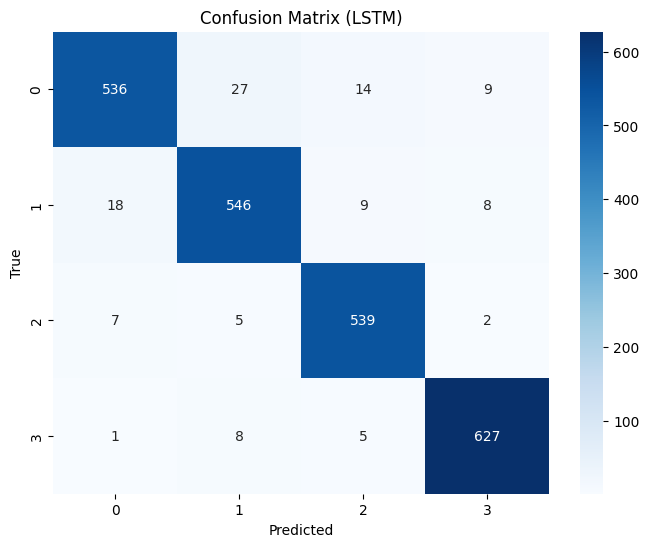

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       586
           1       0.93      0.94      0.94       581
           2       0.95      0.97      0.96       553
           3       0.97      0.98      0.97       641

    accuracy                           0.95      2361
   macro avg       0.95      0.95      0.95      2361
weighted avg       0.95      0.95      0.95      2361



In [18]:
# Make predictions
y_pred = model.predict(X_test)

# Convert predictions to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(Y_test, y_pred_classes)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix (LSTM)")
plt.show()

# Calculate other classification metrics
report = classification_report(Y_test, y_pred_classes)
print(report)


1.  LSTMs are excellent at capturing long-term dependencies and temporal patterns in sequential data, making them well-suited for audio data where understanding the context over time is crucial. They can capture features related to the sequence of audio samples and variations in speech over time. |  CNNs, when applied to audio spectrograms, capture spatial patterns in the time-frequency domain. They excel at identifying spectral features, such as frequency components and local patterns, but may not capture long-term dependencies in audio as effectively as LSTMs.
2. LSTMs work directly with sequential data and can handle variable-length audio sequences. They learn the temporal relationships between audio samples, which can be advantageous for tasks that involve understanding spoken language and recognizing words based on the sequence of sound. | CNNs require fixed-size input (e.g., spectrograms of fixed dimensions) and operate on localized spatial patterns. If the model architecture doesn't include recurrent components, it might struggle to capture long-range dependencies in the audio data.
3. LSTMs often require more data to generalize well, especially if the audio data has complex and varied temporal patterns. If the dataset is limited, an LSTM model may overfit. | CNNs are known to work well with smaller datasets, and their ability to capture local patterns can help mitigate overfitting.